In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics packages
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
#import initial data
df_raw = pd.read_csv ("C:/Users/blien/Documents/WGU/D212/Task1/medical_clean.csv",dtype={'locationid':np.int64}) 
df_raw.shape

(10000, 50)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
df_clean = df_raw.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital',
       'CaseOrder', 'Zip', 'Lat', 'Lng','Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population'])
df_clean.shape

(10000, 27)

In [5]:
df_add = df_clean.loc[(df_clean.ReAdmis =="Yes")]
df_add.shape

(3669, 27)

In [6]:
# variable for categorical data
cat_cols = df_add.select_dtypes(include="object").columns
print(cat_cols)

Index(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [7]:
# filter numerical variables
num_cols = df_add.select_dtypes(include="float")
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3669 entries, 5000 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              3669 non-null   float64
 1   VitD_levels         3669 non-null   float64
 2   Initial_days        3669 non-null   float64
 3   TotalCharge         3669 non-null   float64
 4   Additional_charges  3669 non-null   float64
dtypes: float64(5)
memory usage: 172.0 KB


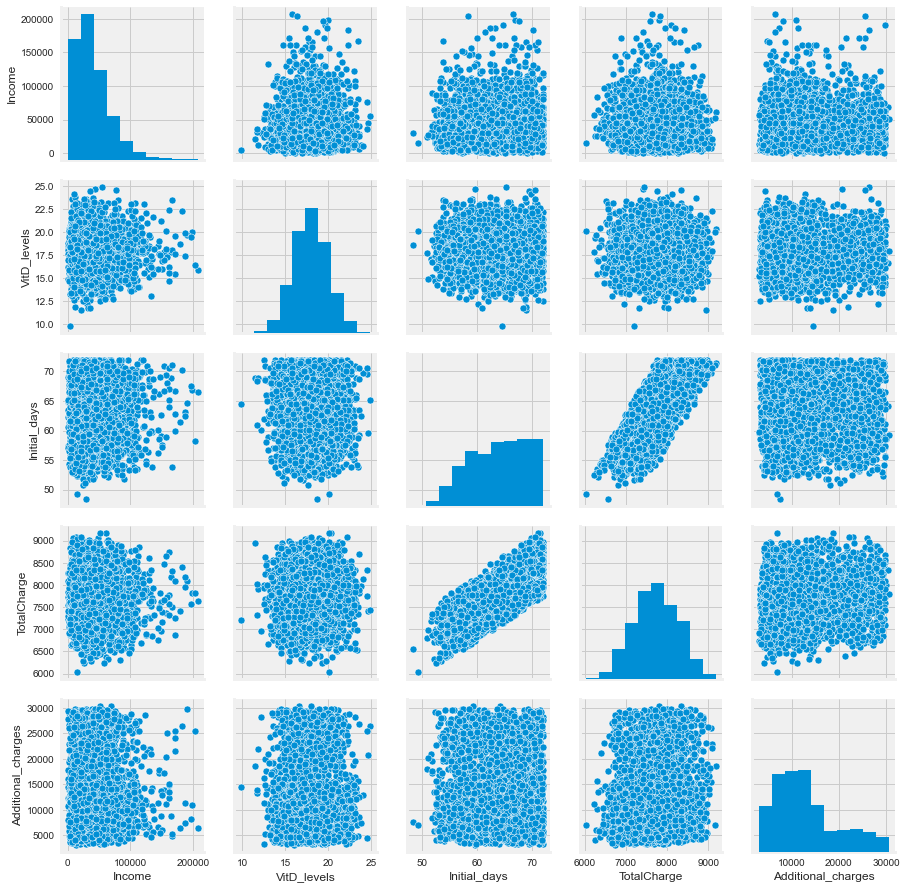

In [33]:
# describe combinations of numerical data
sns.pairplot(num_cols)

In [8]:
# describe standardized data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_cols.values)
df_standardized = pd.DataFrame(scaled_features,
        index=num_cols.index, 
      columns=num_cols.columns)

In [22]:
df_final = df_standardized.drop(columns=['Income', 'VitD_levels','Initial_days'])

In [23]:
df_final

,TotalCharge,Additional_charges
5000,1.142798,2.400365
5001,-0.750662,0.169080
5005,-0.837581,-1.085610
5006,-1.380703,-0.410182
5008,0.097638,-0.563564
...,...,...
9992,0.312650,0.659869
9996,0.024683,2.362772
9997,1.034462,0.340855
9998,-0.158861,-0.805636


In [24]:
#export clean data to CSV file
df_final.to_csv('C:/Users/blien/Documents/WGU/D212/Task1/medical_data_output.csv')

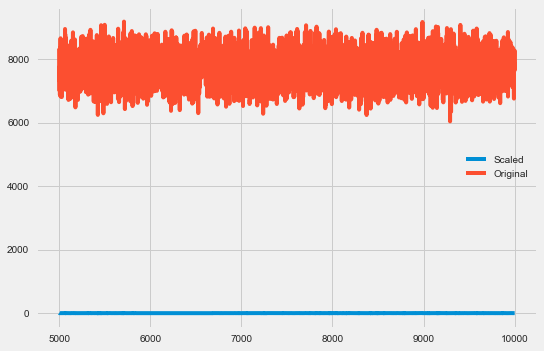

In [25]:
plt.plot(df_final['TotalCharge'], label = "Scaled")
plt.plot(num_cols['TotalCharge'], label = "Original")
plt.legend()
plt.show()

In [26]:
B = df_final[['TotalCharge','Additional_charges']]

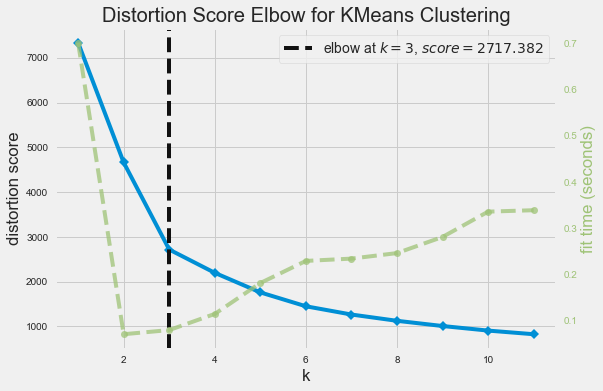

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(B)
visualizer.show()

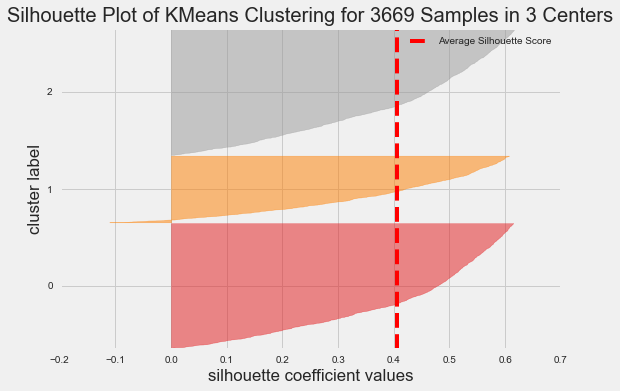

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3669 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
model_3clust = KMeans(n_clusters = 3, random_state=10)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(B)    
sil_visualizer.show()

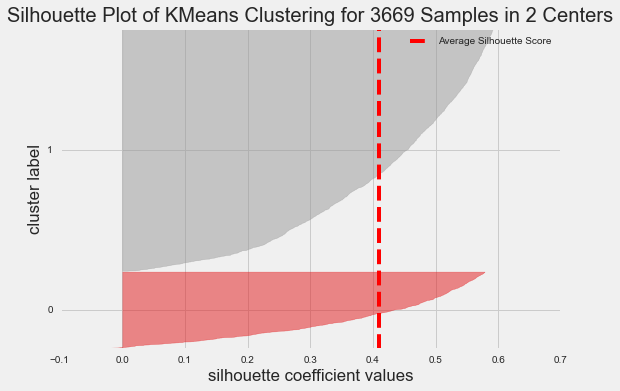

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3669 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
model_2clust = KMeans(n_clusters = 2, random_state=10)

sil_visualizer = SilhouetteVisualizer(model_2clust)
sil_visualizer.fit(B)    
sil_visualizer.show()

In [30]:
silhouette_coefficients = []
   ...:
   ...: # Notice you start at 2 clusters for silhouette coefficient
   ...: for k in range(2, 11):
   ...:     kmeans = KMeans(n_clusters=k)
   ...:     kmeans.fit(B)
   ...:     score = silhouette_score(B, kmeans.labels_)
   ...:     silhouette_coefficients.append(score)

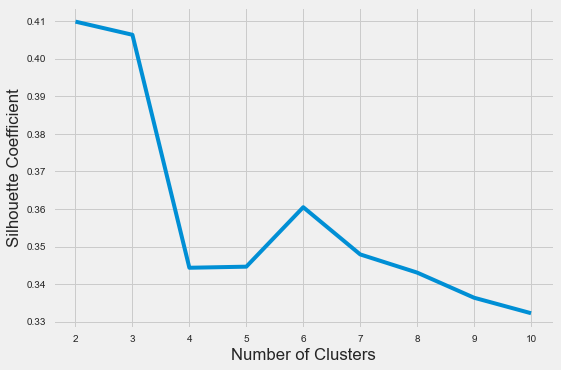

In [31]:
 plt.style.use("fivethirtyeight")
   ...: plt.plot(range(2, 11), silhouette_coefficients)
   ...: plt.xticks(range(2, 11))
   ...: plt.xlabel("Number of Clusters")
   ...: plt.ylabel("Silhouette Coefficient")
   ...: plt.show()

Text(0.5, 1.0, 'K-Means Clustering (k=2) for Readmitted Patients')

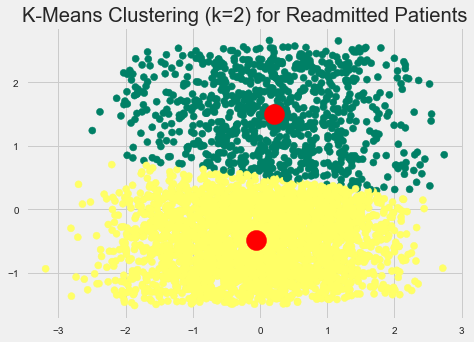

In [32]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(B)
fig, ax = plt.subplots(figsize =(7, 5))
title = 'K-Means Clustering (k=' + str(n_clusters) + ') for Readmitted Patients'
ax.scatter(x=B. iloc[:, 0],y=B. iloc[:, 1],
    c=kmeans.labels_,cmap='summer')
ax.scatter(x=kmeans.cluster_centers_[:,0],
    y=kmeans.cluster_centers_[:,1],
    color='red', marker='o',s=400 )
plt.title(title)

Text(0.5, 1.0, 'K-Means Clustering (k=3) for Readmitted Patients')

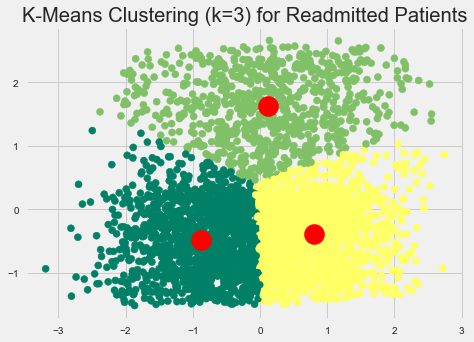

In [33]:
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(B)
fig, ax = plt.subplots(figsize =(7, 5))
title = 'K-Means Clustering (k=' + str(n_clusters) + ') for Readmitted Patients'
ax.scatter(x=B. iloc[:, 0],y=B. iloc[:, 1],
    c=kmeans.labels_,cmap='summer')
ax.scatter(x=kmeans.cluster_centers_[:,0],
    y=kmeans.cluster_centers_[:,1],
    color='red', marker='o',s=400 )
plt.title(title)

In [20]:
for i in range(2,7):
    KMean= KMeans(n_clusters=i, random_state=42)
    KMean.fit(B)
    cluster_labels=KMean.predict(B)
    SB_score = silhouette_score(B, cluster_labels)
    print('Silhouette score (n={}) is {:.8f}'.format(i,SB_score ))

Silhouette score (n=2) is 0.40989567
Silhouette score (n=3) is 0.40639645
Silhouette score (n=4) is 0.34425053
Silhouette score (n=5) is 0.34463895
Silhouette score (n=6) is 0.36013084
